In [1]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_json('data/bigfoot_data.json', lines = True)

In [5]:
df.head()

,_id,html,time,url
0,{'$oid': '5939abbd2acdf6607095366c'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:40 2017,show_report.asp?id=13038
1,{'$oid': '5939abbd2acdf6607095366d'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=8792
2,{'$oid': '5939abbd2acdf6607095366e'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=1255
3,{'$oid': '5939abbd2acdf6607095366f'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=11616
4,{'$oid': '5939abbe2acdf66070953670'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:42 2017,show_report.asp?id=637


In [6]:
df['html'][0]

'\r\n<!doctype html public "-//w3c//dtd html 4.0 transitional//en">\r\n<HTML>\r\n\t<HEAD>\r\n        <meta http-equiv="X-UA-Compatible" content="IE=EmulateIE7" />\r\n        <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\r\n    <meta name="KEYWORDS" content="bigfoot, big foot, BigFoot, BFRO, Bigfoot research, sightings database, organizations, Organization, sightings, lists, locations, areas, reports, report, ape, apes, forest, giant, giants, monster, monsters, swamp, creek, Florida, Skunk Ape Florida Skuk Ape, Abominable Snowman, Agogwe, Almasti, Batutut-Borneo, Didi, Dwendi, Kakundakari, Kung-Lu, Mapinguary, Muhalu, sasquatch, sasquach, Sedapa, Orang Pendek, Shiru, Sisimite, Skunk Ape, Tok- Burma, Yeti, Yowie, cryptozoology, animals, strange, glowing eyes, foot prints, cast, tracks, fottprint cast, hairy, beast, mystery, paranormal, ufo, x-files, xfiles, bionic woman, sightings, sighting, IVBC, Byrne, report, howl, scream, primate, everglades, Florida Evergl

In [7]:
soup = BeautifulSoup(df['html'][0], 'html.parser')

In [8]:
soup.get_text()

'\n\n\n\n\n\n\nBFRO Report 13038: Snowmobiler has encounter in deep snow near Potter, AK\n\n\r\n\t\tfunction runLogo() {\r\n\t\t\tvar logo = document.getElementById("logo");\r\n\t\t\tif(logo != null)\r\n\t\t\t{\r\n\t\t\t\tlogo.src=logo.src + \'a;\'\r\n\t\t\t}\r\n\t\t}\r\n\t\t\r\n\t\t\n\n\n\n\n\n\r\n\t\t\t<!--\r\n\t\t\t\tif (document.images) \r\n\t\t\t\t{\r\n\t\t\t\t\tb_Media_Articles = new Image();\r\n\t\t\t\t\tb_Media_Articles.src = "/images/templates/b-Media%20Articles_hl.jpg";\r\n\t\t\t\t\tb_Media_Articles_orig = new Image();\r\n\t\t\t\t\tb_Media_Articles_orig.src = "/images/templates/b-Media%20Articles.jpg";\r\n\t\t\t\t\tb_ReportForm = new Image();\r\n\t\t\t\t\tb_ReportForm.src = "/images/templates/b-Report%20Form_hl.jpg";\r\n\t\t\t\t\tb_ReportForm_orig = new Image();\r\n\t\t\t\t\tb_ReportForm_orig.src = "/images/templates/b-Report%20Form.jpg";\r\n\t\t\t\t\tb_Home = new Image();\r\n\t\t\t\t\tb_Home.src = "/images/templates/b-Home_hl.jpg";\r\n\t\t\t\t\tb_Home_orig = new Image();\r\n

In [9]:
soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE doctype html public "-//w3c//dtd html 4.0 transitional//en">

<html>
<head>
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="bigfoot, big foot, BigFoot, BFRO, Bigfoot research, sightings database, organizations, Organization, sightings, lists, locations, areas, reports, report, ape, apes, forest, giant, giants, monster, monsters, swamp, creek, Florida, Skunk Ape Florida Skuk Ape, Abominable Snowman, Agogwe, Almasti, Batutut-Borneo, Didi, Dwendi, Kakundakari, Kung-Lu, Mapinguary, Muhalu, sasquatch, sasquach, Sedapa, Orang Pendek, Shiru, Sisimite, Skunk Ape, Tok- Burma, Yeti, Yowie, cryptozoology, animals, strange, glowing eyes, foot prints, cast, tracks, fottprint cast, hairy, beast, mystery, paranormal, ufo, x-files, xfiles, bionic woman, sightings, sighting, IVBC, Byrne, report, howl, scream, primate, everglades, Florida Everglades, swamp, Gigantopit

In [10]:
cols = ['SUBMITTED', 'TITLE', 'YEAR', 'SEASON', 'MONTH',
                                  'STATE', 'COUNTY', 'LOCATION DETAILS', 'NEAREST TOWN',
                                  'NEAREST ROAD', 'OBSERVED', 'ALSO NOTICED',
                                  'OTHER WITNESSES', 'OTHER STORIES', 'TIME AND CONDITIONS',
                                  'ENVIRONMENT']

# save this for later
# for i, col in enumerate(cols):
#     cols[i] = col.lower()

html_df = pd.DataFrame(columns = cols)
html_df

,SUBMITTED,TITLE,YEAR,SEASON,MONTH,STATE,COUNTY,LOCATION DETAILS,NEAREST TOWN,NEAREST ROAD,OBSERVED,ALSO NOTICED,OTHER WITNESSES,OTHER STORIES,TIME AND CONDITIONS,ENVIRONMENT


In [11]:
for doc in df.html:
    doc_dict = dict()
    souped_doc = BeautifulSoup(doc, 'html.parser')
    spans = souped_doc.find_all('span', {'class': 'field'})
    
    try:
        doc_dict['SUBMITTED'] = spans[0].text
        doc_dict['TITLE'] = spans[1].text
    except:
        continue
        
    for sentence in souped_doc.find_all("p"):
        if any(span in sentence for span in spans):
            text = sentence.text
            #print (text)
            #print('------\n')
            list_info = text.split(': ',1)
            #print(list_info)
            doc_dict[list_info[0]] = list_info[1]
    
    html_df = html_df.append({k:doc_dict[k] for k in cols if k in doc_dict}, ignore_index=True)
    
newcols = []

for col in html_df.columns:
    newcols.append(col.lower())
    
html_df.columns = newcols

In [12]:
print(html_df.shape)
html_df.head()

(4799, 16)


,submitted,title,year,season,month,state,county,location details,nearest town,nearest road,observed,also noticed,other witnesses,other stories,time and conditions,environment
0,"Submitted by witness on Saturday, November...",Snowmobiler has encounter in deep snow near Po...,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the...",My two friends were snowmachining behind me bu...,I have not heard of any other incidents in Anc...,Middle of the night. The only light was the he...,"In the middle of the woods, in a clearing cove..."
1,"Submitted by witness on Thursday, June 3, ...",Four nocturnal hikers get pelted with snow nea...,2003,Winter,December,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe...","We smelled of colonge and after shave, and one...","4. Me, w-man, warren and sean. We were at my h...",no,"Started at 11, ended at about 3-3:30. Weather ...","A pine forest, with a bog or swamp on the righ..."
2,"Submitted by witness A. M. on Tuesday, Octob...",Creature observed walking back and forth by wi...,1998,Fall,September,Alaska,Bethel County,"45 miles by air west of Lake Iliamna, Alaska i...",NaN,NaN,My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binocul...,NaN,NaN,Call Iliamna Air taxi for lat & Long of Long L...
3,"Submitted by witness on Friday, May 6, 2005.",Fishermen find footprints east of Egegik,2004,Summer,July,Alaska,Bristol Bay County,"Approximately 95 miles east of Egegik, Alaska....",Egegik,NaN,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...,"One other witness, and he was fishing prior to...","I've only heard of one other story, from an ol...","Approximately 12:30 pm, partially coudy/sunny.","Lake front,creek spit, gravel and sand, alder ..."
4,"Submitted by witness on Monday, November 1...",Campers' encounter just after dark in the Wran...,2000,Summer,June,Alaska,Cordova-McCarthy County,"On the main trail toward the glacier, before t...","Kennikot, Alaska",not sure,My hiking partner and I arrived late to the Ke...,I did hear what appeared to be grunting in the...,"I was the only witness, there was one other in...",None,About 12:00 Midnight / full moon / clear / dim...,This sighting was located at approximately 1 t...


In [13]:
import seaborn as sns

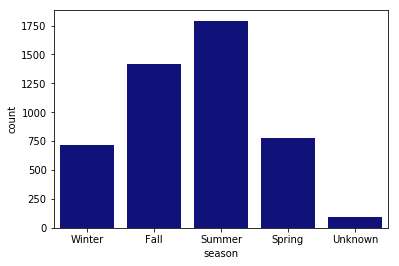

In [14]:
ax = sns.countplot(x="season", data=html_df, color = 'darkblue')

## Basic NLP

In [15]:
observations = html_df.observed.dropna()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_df=1.0, min_df=1,
                             max_features=None)
count_vect.fit(observations)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
#count_vect.vocabulary_

In [18]:
import collections
vocab = collections.Counter(count_vect.vocabulary_)
vocab.most_common(3) # this isn't giving the most common, it's giving the indices, but will save here for later

[('zz', 27663), ('zoos', 27662), ('zooology', 27661)]

In [ ]:
X_train_counts = count_vect.transform(observations)
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))

The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 4767 rows (documents) and 27664 columns (words).


In [ ]:
X_train_counts

<4767x27664 sparse matrix of type '<class 'numpy.int64'>'
	with 531488 stored elements in Compressed Sparse Row format>

In [ ]:
doi = 0

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# just do term frequency at first, use_idf = False
tf_transformer = TfidfTransformer(use_idf=False)
tf_transformer.fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
words_doi_tf = X_train_tf[doi]
print("\nThese are the indices, words, and term frequencies in doc. {0}:".
       format(doi))
tf_lst = []
for i in range(words_doi_tf.count_nonzero()):
    word_index = words_doi_tf.indices[i]
    word = count_vect.get_feature_names()[word_index]
    count = words_doi_tf.data[i]
    tf_lst.append(count)
    print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, count))

mag = np.sqrt(np.sum([tf**2 for tf in tf_lst]))
print("\nThe magnitude of the tf vector for this document is {0:0.3f}".format(mag))
print("It used the L2 norm.")


These are the indices, words, and term frequencies in doc. 0:
73      10            0.130
74      100           0.065
123     11            0.065
145     12            0.065
1988    anchorage     0.065
2470    aside         0.065
2731    away          0.065
3112    bear          0.130
3402    bigfoot       0.065
3495    bit           0.065
3828    bored         0.065
3954    brakes        0.065
4533    came          0.130
6122    continued     0.065
6422    covered       0.065
6536    crazy         0.065
6695    cruising      0.065
6827    cut           0.065
6939    darkness      0.065
6996    days          0.065
7006    dead          0.065
7070    decided       0.065
7120    deep          0.065
7506    didn          0.065
7611    direction     0.065
7640    disappeared   0.065
9450    far           0.065
9573    feet          0.065
9689    figured       0.065
10053   followed      0.065
10059   following     0.065
10340   fresh         0.065
10359   friends       0.194
10461   fun  

In [ ]:
# back to the document of interest
print("Document of interest: {0}".format(doi))
nnz_doi = X_train_counts[doi].getnnz(axis=1)
nwords_doi = X_train_counts[doi].sum()
print("There are {0} non-zero word counts in document {1}.".format(nnz_doi[0], doi))
print("There are {0} words in document {1}.".format(nwords_doi, doi))

In [ ]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
words_doi_tfidf = X_train_tfidf[doi] 
print("\nThese are the indices, words, and tf-idf values in doc. {0}:".
      format(doi)) 
for i in range(words_doi_tfidf.count_nonzero()): 
    word_index = words_doi_tfidf.indices[i] 
    word = count_vect.get_feature_names()[word_index]
    tfidf = words_doi_tfidf.data[i]
    print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, tfidf))

## LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
conditions = html_df['time and conditions'].dropna()

In [ ]:
num_features = 1000

# LDA can only uses raw term counts
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(conditions)

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names() #theses are the words in our bag of words

In [ ]:
num_topics = 3

# Run LDA
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
lda.fit(tf)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
display_topics(lda, tf_feature_names, num_top_words)

In [ ]:
environment = html_df['environment'].dropna()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def LDA(data, n_topics, num_features, num_top_words):

    # LDA can only uses raw term counts
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(data)
    
    tf_feature_names = tf_vectorizer.get_feature_names() #theses are the words in our bag of words
    
    # Run LDA
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online',random_state=0, n_jobs=-1)
    lda.fit(tf)
    
    return display_topics(lda, tf_feature_names, num_top_words)

In [ ]:
LDA(conditions, 3, 1000, 10)

In [ ]:
LDA(environment, 3, 1000, 10)

In [ ]:
observations = html_df['observed'].dropna()

In [ ]:
LDA(observations, 5, 1000, 20)

## Clustering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text

data = observations
n_clusters = 3
n_words = 5
custom_stop_words = ['saw','heard','woods','just','did','time','like','road','said','small','area']
stopwords = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

def cluster_model(data, n_clusters = 10, n_words = 10, stopwords = 'english'):
    stopwords = text.ENGLISH_STOP_WORDS.union(custom_stop_words)
    
    count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words=stopwords,
                                 analyzer='word', max_df=1.0, min_df=1,
                                 max_features=None)
    count_vect.fit(data)
    word_counts = count_vect.transform(data)

    km = KMeans(n_clusters)
    km.fit(word_counts)
    centroids = np.array(km.cluster_centers_)

    topwords_index = np.zeros((n_clusters,n_words))
    for i in range(centroids.shape[0]):
        topwords_index[i] += centroids[i].argsort()[::-1][:n_words]
    topwords_index = topwords_index.astype(int)
    topiclist = []
    for i in range(topwords_index.shape[0]):
        wordlist = []
        for j in range(topwords_index.shape[1]):
            wordlist.append(count_vect.get_feature_names()[topwords_index[i][j]])
        words = ', '.join(wordlist)
        topiclist.append(words)
    return topiclist

In [ ]:
cluster_model(data = observations, n_clusters = 5, n_words = 10)

In [ ]:
cluster_model(data = observations, n_clusters = 5, n_words = 10, stopwords = custom_stop_words)

In [ ]:
cluster_model(data = environment, n_clusters = 5, n_words = 10, stopwords = custom_stop_words)

In [ ]:
cluster_model(data = conditions, n_clusters = 3, n_words = 10, stopwords = custom_stop_words)